In [1]:
#det her er den udgave med det cleanede data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\astri\AppData\Local\Temp\ipykernel_8248\663791057.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_pickle("labeled_content.pkl")

NameError: name 'pd' is not defined

In [3]:
print(len(data))
def fun(doc):
   return doc

vectorizer = TfidfVectorizer(
    tokenizer=fun,
    preprocessor=fun,
    token_pattern=None)  

420761


In [4]:
print("vectorize")
X = vectorizer.fit_transform(data["content"])
print(X.shape)

vectorize
(420761, 955247)


In [5]:
def bin_target(x):
    if x=="reliable":
        return 0
    if x=="fake":
        return 1

y = data["type"].apply(lambda x:bin_target(x)).astype(int)

X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size=0.5,random_state=0,shuffle=True) 

In [6]:
#reproducible
clf1 = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2).fit(X_train, y_train)
clf1.score(X_val,y_val)
clf1.f_1_score(X_val,y_val)

c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


AttributeError: 'MLPClassifier' object has no attribute 'f_1_score'

In [7]:
#try with different activation functio
clf2 = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20), max_iter=1,tol=0.1,n_iter_no_change=2, activation="tanh").fit(X_train, y_train)
clf2.score(X_val,y_val)
clf2.f1_score(X_val,y_val)

Iteration 1, loss = 0.15056016


c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


AttributeError: 'MLPClassifier' object has no attribute 'f_1_score'

In [10]:
y_pred = clf2.predict(X_val)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

accuracy: 0.9590740564692462
F1: 0.9574015436374431


In [11]:
#try with different activation function
clf3 = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2, activation="logistic").fit(X_train, y_train)
y_pred = clf3.predict(X_val)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))
#ikke lige så god

Iteration 1, loss = 0.26011617


c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy: 0.9504705770510504
F1: 0.9482518871672626


In [12]:
X_train = vectorizer.fit_transform(X_train)
print(X.shape)
X_val = vectorizer.transform(X_val)

TypeError: unhashable type: 'csr_matrix'

In [13]:
#try with more layers
#husk at bruge den bedste aktivations-funktion
clf4 = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20,20,20,20), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2,activation="tanh").fit(X_train, y_train)
y_pred = clf4.predict(X_val)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


accuracy: 0.947998859207149
F1: 0.9461508170899784


In [ ]:
#try with more layers and less neurons
#husk at justere antal lag så det er det bedste
clf5 = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10,10,10,10), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2).fit(X_train, y_train)
y_pred = clf5.predict(X_val)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

In [ ]:
#model = MLPClassifier(random_state=1, max_iter=1,tol=0.1,n_iter_no_change=2,early_stopping=True)
#distributions = dict(hidden_layer_sizes=[(50,50,50),(20,20,20,20,20),(100,100,100)],activation=["logistic", "tanh", "relu"])
#get_best = RandomizedSearchCV(model, distributions, random_state=1)
#search = get_best.fit(X_train, y_train)
#search.best_params_


c:\Users\astri\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


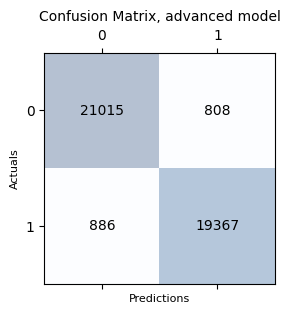

In [ ]:
#evaluation
y_pred = clf.predict(X_val)
cm = confusion_matrix(y_true=y_val,y_pred=y_pred)

fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(2):
    for j in range(2):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')
 
plt.xlabel('Predictions', fontsize=8)
plt.ylabel('Actuals', fontsize=8)
plt.title('Confusion Matrix, advanced model', fontsize=10)
plt.show()


In [ ]:
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
print("Precision:", precision)
print("Recall:", recall)

accuracy: 0.9597395189656811
F1: 0.9580983476798258
Precision: 0.9599504337050806
Recall: 0.9562533945588307


In [ ]:
model = MLPClassifier(random_state=1, max_iter=1,verbose=True,tol=0.01,n_iter_no_change=3,early_stopping=True)
clf = GridSearchCV(model,{"hidden_layer_sizes":((50,50,50),(20,20,20,20,20),(50,)),"activation":"‘identity’, ‘logistic’, ‘tanh’, ‘relu’"}, scoring='f1', cv=5)
clf.fit(X_train,y_train)

Evaluation on Fake news test-set

In [ ]:
bestmodel = clf
def evaluate(model, name):
    print(f"evaluating {name}")
    y_pred = model.predict(X_test)
    print("accuracy:", accuracy_score(y_pred,y_test))
    print("F1:", f1_score(y_pred,y_test))
    precision = precision_score(y_val, y_test)
    recall = recall_score(y_val, y_test)
    print("Precision:", precision)
    print("Recall:", recall)
    cm = confusion_matrix(y_true=y_test,y_pred=y_test)
    fig, ax = plt.subplots(figsize=(3,3))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(2):
        for j in range(2):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')
    plt.xlabel('Predictions', fontsize=8)
    plt.ylabel('Actuals', fontsize=8)
    plt.title(f'Confusion Matrix, {name}', fontsize=10)
    plt.show()

In [ ]:
#evaluate(bestmodel, "advanced model")

In [ ]:
#getting baseline for same dataset: logistic regression where x is length of article
X_len_train = pd.DataFrame(X_train["content"].apply(lambda x: len(x))) #get feature with length of article
X_len_val = pd.DataFrame(X_val["content"].apply(lambda x: len(x))) #get X for validation

baseline = LogisticRegression()
reg = baseline.fit(X_len_train,y_train)

y_pred = baseline.predict(X_len_val) #er det test eller validation?
acc = accuracy_score(y_pred,y_val)

print(acc)

In [ ]:
evaluate(baseline, "baseline")

Evaluation on the LIAR dataset

In [ ]:
liar = pd.concat([pd.read_csv("train.tsv", sep="\t",header=None),pd.read_csv("test.tsv", sep="\t",header=None),pd.read_csv("valid.tsv", sep="\t",header=None)])



In [ ]:
print(len(liar))
print(liar[1].value_counts())
print(liar.head())

12791
1
half-true      2627
false          2507
mostly-true    2454
barely-true    2103
true           2053
pants-fire     1047
Name: count, dtype: int64
           0            1                                                  2   \
0   2635.json        false  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        false  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   

                                   3               4                     5   \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    bl

In [ ]:
true = set(["half-true","mostly-true","barely-true","true"])
false = set(["false","pants-fire"])
def get_bin_y_liar(x):
    if x in true:
        return 0
    if x in false:
        return 1
    
y_test = liar[1]
X_test = liar[2]

In [ ]:
evaluate(bestmodel, "advanced model")

In [ ]:
evaluate(baseline, "baseline")